# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [6]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [81]:
# Criar as duas faixas de Latitude do município
sinasc_raw['Faixa_Latitude'] = pd.cut(sinasc_raw['munResLat'],
                                      bins=[-np.inf, -10.5, np.inf],
                                      labels=['Abaixo de -10.5','Acima de -10.5'])

estatisticas_latitude = sinasc_raw.groupby('Faixa_Latitude').agg({
    'QTDFILVIVO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'QTDFILMORT': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

estatisticas_latitude

QTDFILVIVO                                                  \
                       sum      mean  min   max median       std       var   
Faixa_Latitude                                                               
Abaixo de -10.5    12600.0  0.980011  0.0  30.0    1.0  1.138300  1.295727   
Acima de -10.5     14226.0  1.129317  0.0  12.0    1.0  1.198613  1.436674   

                QTDFILMORT                                                  
                       sum      mean  min   max median       std       var  
Faixa_Latitude                                                              
Abaixo de -10.5     3105.0  0.242521  0.0  28.0    0.0  0.599430  0.359317  
Acima de -10.5      3538.0  0.291770  0.0   9.0    0.0  0.627856  0.394204

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [82]:
# Criar as duas faixas da área dos municípios
sinasc_raw['Faixa_Area'] = pd.cut(sinasc_raw['munResArea'], bins=[-np.inf, 3000, np.inf], labels=['Abaixo de 3000', 'Acima de 3000'])

# Aplicar o groupby e calcular as estatísticas
estatisticas_area = sinasc_raw.groupby('Faixa_Area').agg({
    'IDADEMAE': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'IDADEPAI': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})
estatisticas_area

IDADEMAE                                                 \
                    sum       mean min max median       std        var   
Faixa_Area                                                               
Abaixo de 3000   137389  26.324775  11  53   26.0  6.305535  39.759775   
Acima de 3000    567848  26.038518  12  53   25.0  6.405497  41.030387   

                IDADEPAI                                                     
                     sum       mean   min   max median       std        var  
Faixa_Area                                                                   
Abaixo de 3000   78074.0  31.092792  16.0  69.0   30.0  7.675474  58.912900  
Acima de 3000   158424.0  31.094014  15.0  86.0   30.0  7.818364  61.126809

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [21]:
# Criar três faixas de altitude
sinasc_raw['Alt_Dividida'] = pd.qcut(sinasc_raw['munResAlt'], q=3, labels=['Baixo', 'Médio', 'Alto'])

# Realizar operações estatísticas usando groupby
operacoes = {
    'PESO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'APGAR1': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
}

resultado = sinasc_raw.groupby('Alt_Dividida').agg(operacoes)
resultado

PESO                                              \
                   sum         mean  min   max  median         std   
Alt_Dividida                                                         
Baixo         29506101  3246.710057  295  5135  3280.0  574.665098   
Médio         31760539  3253.486888  292  5480  3275.0  522.680855   
Alto          26387102  3226.990583  258  5985  3260.0  536.077127   

                              APGAR1                                        \
                        var      sum      mean  min   max median       std   
Alt_Dividida                                                                 
Baixo         330239.975019  74610.0  8.262458  0.0  10.0    8.0  0.946455   
Médio         273195.276388  78542.0  8.063033  0.0  10.0    8.0  1.032197   
Alto          287378.686433  65997.0  8.087868  0.0  10.0    8.0  0.955179   

                        
                   var  
Alt_Dividida            
Baixo         0.895777  
Médio         1.065431  
Alto          0.912367

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [11]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

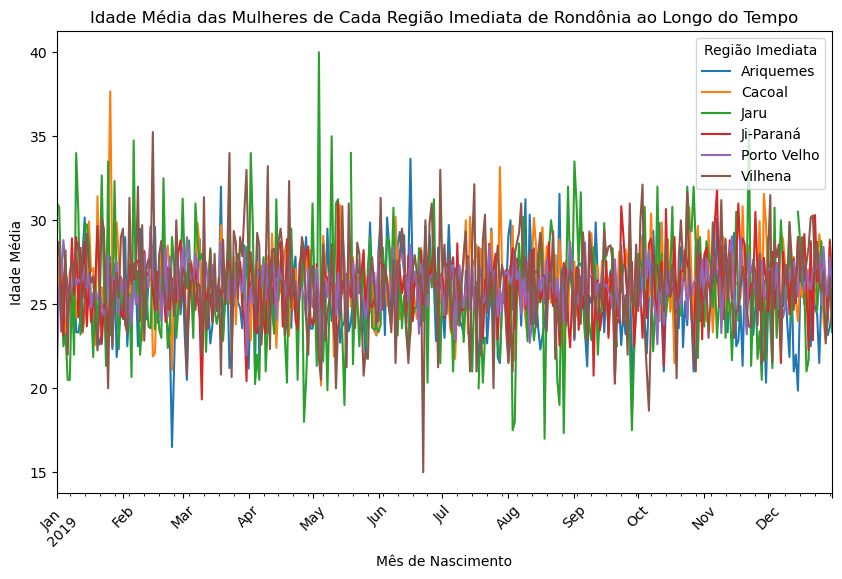

In [40]:
# Definindo 'imediatas' como o índice do DataFrame
sinasc_1 = sinasc_raw.set_index('munResNome')
dados_plotagem = sinasc_1.groupby(['DTNASC', imediatas])['IDADEMAE'].mean().unstack()

# Plotando os dados
ax = dados_plotagem.plot(figsize=(10, 6))
ax.set_title('Idade Média das Mulheres de Cada Região Imediata de Rondônia ao Longo do Tempo')
ax.set_xlabel('Mês de Nascimento')
ax.set_ylabel('Idade Média')
plt.xticks(rotation=45)

# Definindo um título específico para a legenda
ax.legend(title='Região Imediata')
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [77]:
url_idh = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M"
tabelas_idh = pd.read_html(url_idh)

# Acessar o DataFrame correto na lista (supondo que seja o primeiro DataFrame)
idh_df = tabelas_idh[0]

# Remover a primeira coluna (geralmente a coluna de posição)
idh_df = idh_df.iloc[:, 1:]

# Setando a primeira coluna (que provavelmente é o nome do município) como índice do dataframe
idh_df.set_index(idh_df.columns[0], inplace=True)

idh_df

Dados de 2010  \
                                              IDH municipal   
                                           IDH-M muito alto   
(Município, Município, IDH-M muito alto)                      
nenhum município                           nenhum município   
IDH-M alto                                       IDH-M alto   
Porto Velho                                           0.736   
Vilhena                                               0.731   
Cacoal                                                0.718   
Ji-Paraná                                             0.714   
Pimenta Bueno                                         0.710   
Ariquemes                                             0.702   
Rolim de Moura                                        0.700   
IDH-M médio                                     IDH-M médio   
Cerejeiras                                            0.692   
Jaru                                                  0.689   
Colorado do Oeste                                     0.685   
Ouro Preto do Oeste                                   0.682   
Espigão d'Oeste                                       0.672   
Santa Luzia d'Oeste                                   0.670   
Pimenteiras do Oeste                                  0.665   
Presidente Médici                                     0.664   
Castanheiras                                          0.658   
Guajará-Mirim                                         0.657   
Chupinguaia                                           0.652   
Cabixi                                                0.650   
Candeias do Jamari                                    0.649   
São Felipe d'Oeste                                    0.649   
Cacaulândia                                           0.646   
São Miguel do Guaporé                                 0.646   
Mirante da Serra                                      0.643   
Alvorada d'Oeste                                      0.643   
Teixeirópolis                                         0.643   
Nova Brasilândia d'Oeste                              0.643   
Rio Crespo                                            0.643   
Primavera de Rondônia                                 0.641   
Alta Floresta d'Oeste                                 0.641   
Ministro Andreazza                                    0.638   
Novo Horizonte do Oeste                               0.634   
Vale do Paraíso                                       0.627   
Alto Paraíso                                          0.625   
Parecis                                               0.617   
Buritis                                               0.616   
Itapuã do Oeste                                       0.614   
Corumbiara                                            0.613   
Cujubim                                               0.612   
Costa Marques                                         0.611   
São Francisco do Guaporé                              0.611   
Urupá                                                 0.609   
Monte Negro                                           0.607   
IDH-M baixo                                     IDH-M baixo   
Seringueiras                                          0.598   
Governador Jorge Teixeira                             0.596   
Machadinho d'Oeste                                    0.596   
Campo Novo de Rondônia                                0.593   
Alto Alegre dos Parecis                               0.592   
Theobroma                                             0.589   
Nova União                                            0.587   
Nova Mamoré                                           0.587   
Vale do Anari                                         0.584   
IDH-M muito baixo                         IDH-M muito baixo   
nenhum município                           nenhum município   

                                                             \
                                                  IDH renda   
             

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [78]:
url_ifdm = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM"
tabelas_ifdm = pd.read_html(url_ifdm)

# Acessar o DataFrame correto na lista (supondo que seja o primeiro DataFrame)
ifdm_df = tabelas_ifdm[0]

# Remover a primeira coluna (geralmente a coluna de posição)
ifdm_df = ifdm_df.iloc[:, 1:]

# Setando a primeira coluna (que provavelmente é o nome do município) como índice do dataframe
ifdm_df.set_index(ifdm_df.columns[0], inplace=True)
ifdm_df

,IFDM Consolidado (2013)
,Desenvolvimento alto
"(Município, Desenvolvimento alto)",
nenhum município,nenhum município
Desenvolvimento moderado,Desenvolvimento moderado
Ariquemes,0.7746
Vilhena,0.7465
Pimenta Bueno,0.7383
Porto Velho,0.7257
Ji-Paraná,0.7117
Cacoal,0.7111


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [80]:
url_pib = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB"
tabelas_pib = pd.read_html(url_pib)

# Acessar o DataFrame correto na lista (supondo que seja o primeiro DataFrame)
pib_df = tabelas_pib[0]

# Remover a primeira coluna (geralmente a coluna de posição)
pib_df = pib_df.iloc[:, 1:]

# Setando a primeira coluna (que provavelmente é o nome do município) como índice do dataframe
pib_df.set_index(pib_df.columns[0], inplace=True)

pib_df

,Município,PIB,Alteração
,Município,PIB,Alteração
"(Posição, Mudança (2014))",,,
(0),Porto Velho,17 912 070,NaN
(0),Ji-Paraná,3 783 972,NaN
(0),Vilhena,2 831 175,NaN
(0),Ariquemes,2 579 830,NaN
(0),Cacoal,2 261 644,NaN
(0),Jaru,1 500 890,NaN
(0),Rolim de Moura,1 283 434,NaN
(0),Pimenta Bueno,1 164 877,NaN


Após analisar os dados do Produto Interno Bruto (PIB) dos municípios de Rondônia, podemos destacar alguns insights interessantes:

**Disparidade Econômica:** É possível observar uma grande disparidade econômica entre os municípios de Rondônia, com alguns apresentando um PIB significativamente maior do que outros. Essa disparidade pode ser atribuída a uma série de fatores, como diferenças na atividade econômica predominante, investimentos em infraestrutura, acesso a recursos naturais, entre outros.

**Concentração Econômica:** É provável que os municípios com os maiores PIBs sejam os centros econômicos e industriais mais desenvolvidos do estado, como a capital Porto Velho e outros municípios próximos a áreas de grande atividade econômica, como Vilhena, Cacoal, Ji-Paraná, entre outros.

**Impacto das Atividades Econômicas:** A análise do PIB também pode revelar insights sobre as atividades econômicas dominantes em determinadas regiões. Por exemplo, municípios com um PIB mais alto podem ter uma forte presença de setores como agricultura, pecuária, indústria ou serviços, enquanto municípios com um PIB mais baixo podem depender mais de atividades tradicionais ou ter uma economia menos diversificada.

Em suma, a análise do PIB dos municípios de Rondônia pode fornecer uma visão abrangente do panorama econômico do estado, destacando tanto as áreas de força econômica quanto os desafios a serem enfrentados para promover um desenvolvimento mais equitativo e sustentável.